In [121]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import numpy as np

In [2]:
df = pd.read_table('data-final.csv', na_values=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [3]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [4]:
def wrangle(data_frame):
    new_df = data_frame.copy()
    include = ['0','1','2','3','4','5','6','7','8','9']
    for i in new_df.columns:
        if not(i[-1] in include):
            new_df.drop(columns=i, inplace=True)
            
    new_df.dropna(inplace=True)
            
    return new_df

In [5]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [6]:
slim_df = wrangle(df)
slim_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [7]:
slim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874434 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    874434 non-null  float64
 1   EXT2    874434 non-null  float64
 2   EXT3    874434 non-null  float64
 3   EXT4    874434 non-null  float64
 4   EXT5    874434 non-null  float64
 5   EXT6    874434 non-null  float64
 6   EXT7    874434 non-null  float64
 7   EXT8    874434 non-null  float64
 8   EXT9    874434 non-null  float64
 9   EXT10   874434 non-null  float64
 10  EST1    874434 non-null  float64
 11  EST2    874434 non-null  float64
 12  EST3    874434 non-null  float64
 13  EST4    874434 non-null  float64
 14  EST5    874434 non-null  float64
 15  EST6    874434 non-null  float64
 16  EST7    874434 non-null  float64
 17  EST8    874434 non-null  float64
 18  EST9    874434 non-null  float64
 19  EST10   874434 non-null  float64
 20  AGR1    874434 non-null  float64
 21  AGR2    8

In [109]:
def make_target(data_frame, target_col):
    new_df = data_frame.copy()
    new_df['target'] = [0 for num in range(0, len(slim_df))]
    for i in new_df.columns:
        if target_col in i:
            new_df['target'] = new_df['target'] + new_df[i]
            new_df.drop(columns=i, inplace=True)
            
    X = new_df.drop(columns='target')
    y = []
    true_y = new_df['target'] / 10
    for i in true_y:
        if i < 2.91:
            y.append(0)
            
        elif (i >= 2.91) & (i <= 3.15):
            y.append(1)
            
        else:
            y.append(2)
            
    y = pd.Series(y)
    
    return X, y, true_y

In [145]:
X, y, actual_y = make_target(slim_df, 'EXT')

In [146]:
X.head()

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [147]:
print(actual_y.min())
print(actual_y.max())
print(y.min())
print(y.max())

1.0
5.0
0
2


In [148]:
baseline = y.value_counts(normalize=True)
print('Baseline MAE:', baseline)

Baseline MAE: 0    0.384207
2    0.348635
1    0.267158
dtype: float64


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

True
True


In [115]:
'''model = RandomForestClassifier(n_jobs=8,
                               random_state=11,
                               verbose=1)'''
val_set = [(X_val, y_val)]

model = XGBClassifier(n_estimators=1000,
                      eval_set=val_set,
                      eval_metric='merror',
                      early_stopping_rounds=10,
                      random_state=11,
                      n_jobs=8)

#model = RidgeCV(alphas=[0.01, 0.1, 1, 10,100,200, 300, 400, 500], cv=5)

In [116]:
model.fit(X_train, y_train)

[17:39:01] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds, eval_set } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              eval_metric='merror',
              eval_set=[(        EST1  EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  ...  \
727127   3.0   4.0   4.0   2.0   1.0   1.0   2.0   2.0   2.0    4.0  ...   
320724   5.0   4.0   4.0   5.0   5.0   4.0   5.0   3.0   1.0    1.0  ...   
616959   5.0   2.0   4.0   2.0   4.0   5.0   4.0   5.0   3.0    3.0  ...   
514777   4.0   4.0   2.0   2.0   4.0   4.0   4.0...
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
  

In [117]:
model.score(X_train, y_train)

0.627710462317538

In [119]:
model.score(X_test, y_test)

0.46561493993264225

In [120]:
model.feature_importances_

array([0.01950765, 0.08694902, 0.02182521, 0.02264084, 0.01964349,
       0.02061515, 0.0221349 , 0.01977307, 0.02015304, 0.02164455,
       0.02815534, 0.03369198, 0.02108551, 0.02036135, 0.02530481,
       0.0242527 , 0.02014119, 0.03097037, 0.0216184 , 0.05812187,
       0.01999715, 0.01969765, 0.0229269 , 0.02170168, 0.02500014,
       0.02033431, 0.02111335, 0.02604792, 0.02299365, 0.01959923,
       0.02506224, 0.02593296, 0.02120629, 0.02688037, 0.02006725,
       0.02205774, 0.01986931, 0.02112882, 0.01979179, 0.02000078],
      dtype=float32)

In [122]:
perm_imp = permutation_importance(model, X_val, y_val, n_jobs=8, random_state=11)

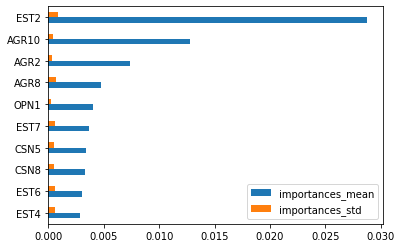

In [125]:
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

graph_df = pd.DataFrame(data, index=X_val.columns)

graph_df.sort_values(by='importances_mean', inplace=True)

graph_df.tail(10).plot.barh();